In [269]:

import scipy
import pandas as pd
import random
import portpy.photon as pp
import numpy as np
from cvxpy import *
from scipy import sparse
import sklearn.metrics
import cProfile
import time
import sys
import psutil
from sklearn.decomposition import PCA
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
import scipy.sparse


In [250]:

data_dir = r'../data'
data = pp.DataExplorer(data_dir=data_dir)
patient_id = 'Lung_Phantom_Patient_1'
data.patient_id = patient_id
ct = pp.CT(data)
structs = pp.Structures(data)
beams = pp.Beams(data)
opt_params = data.load_config_opt_params(protocol_name='Lung_2Gy_30Fx')
structs.create_opt_structures(opt_params)
inf_matrix_sparse = pp.InfluenceMatrix(ct=ct, structs=structs, beams=beams)
protocol_name = 'Lung_2Gy_30Fx'
clinical_criteria = pp.ClinicalCriteria(data, protocol_name)
plan_sparse = pp.Plan(ct, structs, beams, inf_matrix_sparse, clinical_criteria)
opt = pp.Optimization(plan_sparse, opt_params=opt_params)
opt.create_cvxpy_problem()

sol_sparse = opt.solve(solver='MOSEK', verbose=True)
dose_sparse_1d = plan_sparse.inf_matrix.A @ (sol_sparse['optimal_intensity'] * plan_sparse.get_num_of_fractions())
x_sparse =sol_sparse['optimal_intensity'] * plan_sparse.get_num_of_fractions()

beams_dense = pp.Beams(data, load_inf_matrix_full=True)
inf_matrix_dense = pp.InfluenceMatrix(ct=ct, structs=structs, beams=beams_dense, is_full=True)
plan_dense = pp.Plan(ct, structs, beams, inf_matrix_dense, clinical_criteria)
dose_dense_1d = plan_dense.inf_matrix.A @ (sol_sparse['optimal_intensity'] * plan_dense.get_num_of_fractions())
#  Get  A_dense
A_dense = plan_dense.inf_matrix.A
# sparse_tol = plan_sparse.inf_matrix.sparse_tol
#print(sol_sparse['problem_value'])


creating rinds.. This step may take some time due to dilation
rinds created!!
Creating BEV..
Loading sparse influence matrix...
Done
Objective Start
Objective done
Constraints Start
Structure ESOPHAGUS not available!
Structure ESOPHAGUS not available!
Constraints done
                                     CVXPY                                     
                                     v1.5.2                                    
(CVXPY) Sep 11 12:07:59 PM: Your problem has 1946 variables, 110663 constraints, and 0 parameters.
(CVXPY) Sep 11 12:07:59 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 11 12:07:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 11 12:07:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 11 12:07:59 PM: Your problem is compiled with the CPP canonicalization backend.
------------------------------------

In [4]:
# specify the patient data location.
data_dir = r'../data'
# Use PortPy DataExplorer class to explore PortPy data
data = pp.DataExplorer(data_dir=data_dir)
# display the existing patients in console or browser.
data.display_list_of_patients()

,patient_id,disease_site,ptv_vol_cc,num_beams
0,Lung_Phantom_Patient_1,Lung,43.902,72


In [5]:
# pick a patient from the existing patient list to get detailed info (e.g., beam angles, structures).
data.patient_id = 'Lung_Phantom_Patient_1'
# display the data of the patient in console or browser.
beams_df, structs_df = data.display_patient_metadata(return_beams_df=True, return_structs_df=True)
beams_df.head()

,ID,gantry_angle,collimator_angle,couch_angle,beam_modality,energy_MV,influence_matrix(sparse/full),iso_center,MLC_name,machine_name
0,0,0,0,0,Photon,6,Both,"{'x_mm': 79.47996, 'y_mm': 134.0219, 'z_mm': 3...",VARIAN MILLENIUM 120,VARIAN TRUE BEAM
1,1,5,0,0,Photon,6,Both,"{'x_mm': 79.47996, 'y_mm': 134.0219, 'z_mm': 3...",VARIAN MILLENIUM 120,VARIAN TRUE BEAM
2,2,10,0,0,Photon,6,Both,"{'x_mm': 79.47996, 'y_mm': 134.0219, 'z_mm': 3...",VARIAN MILLENIUM 120,VARIAN TRUE BEAM
3,3,15,0,0,Photon,6,Both,"{'x_mm': 79.47996, 'y_mm': 134.0219, 'z_mm': 3...",VARIAN MILLENIUM 120,VARIAN TRUE BEAM
4,4,20,0,0,Photon,6,Both,"{'x_mm': 79.47996, 'y_mm': 134.0219, 'z_mm': 3...",VARIAN MILLENIUM 120,VARIAN TRUE BEAM


In [6]:
structs_df.head()

,name,volume_cc
0,GTV,27.629362
1,LUNGS_NOT_GTV,2983.244630
2,PTV,43.901787
3,CORD,5.307685
4,HEART,841.405457


In [7]:
df_A_dense = pd.DataFrame(A_dense)
df_A_dense.shape

(60183, 542)

In [8]:
df_A_dense

,0,1,2,3,4,5,6,7,8,9,...,532,533,534,535,536,537,538,539,540,541
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:

df_A_sparse = pd.DataFrame(A_sparse)
df_A_sparse.shape

(60183, 1)

In [10]:
df_A_sparse

,0
0,
1,
2,
3,
4,
...,...
60178,
60179,
60180,
60181,


In [273]:
# Get the threshold value used by PortPy to truncate the matrix    
# sparse tol is 1% of the maximum of influence matrix of planner beams

start_time = time.time()

# The sparse and dense matrices are both pre-calculated and included in PorPy data.
#   The sparse matrix; however, was obtained by simply zeroing out the small elements in the dense matrix that were
#   less than a threshold specified in "my_plan.inf_matrix.sparse_tol". Here, we manually generate the sparse
#   matrix from the A_dense matrix using this threshold to clarify the process

#  Get A_sparse
A_sparse = plan_sparse.inf_matrix.A

# Get the threshold value used by PortPy to truncate the matrix
# sparse tol is 1% of the maximum of influence matrix of planner beams
sparse_tol2 = plan_sparse.inf_matrix.sparse_tol
sparse_tol = 0.01*np.amax(A_dense)

# Truncate the dense matrix
A_dense[A_dense <= sparse_tol] = 0
test = np.abs(A_dense - A_sparse.todense()) <= 1e-3

# Check if both influence matrices agree
assert test.all()

end_time = time.time()
total_execution_time = end_time - start_time
print(f"Total execution time of sparse matrix construction  \t: {total_execution_time} seconds")

Total execution time of sparse matrix construction  	: 0.451460599899292 seconds


In [275]:
print(test)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [271]:
print("A_dense:")
print(A_dense[1:7, 0:23])

print("A_sparse:")
print(A_sparse)

print("\nA_sparse:")
print((A_sparse.todense())[1:7, 0:23])


A_dense:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
A_sparse:
  (9917, 233)	0.016086647
  (9918, 233)	0.017288812
  (9919, 233)	0.017336378
  (10040, 234)	0.01604795
  (10041, 234)	0.016188115
  (10042, 234)	0.016508544
  (10043, 234)	0.017050294
  (10044, 234)	0.018119987
  (10045, 234)	0.01847046
  (10046, 234)	0.016722668
  (10101, 235)	0.016639015
  (10102, 235)	0.016785383
  (10103, 235)	0.016535586
  (10104, 235)	0.01627703
  (10105, 235)	0.016100962
  (10108, 235)	0.016029088
  (10508, 77)	0.016020946
  (10626, 77)	0.016256336
  (10627, 78)	0.016463526
  (10682, 77)	0.016085567
  (10739, 78)	0.01

In [25]:
A_sparse.todense().shape

(60183, 542)

In [27]:
A_hat = A_sparse
A = A_dense
p = dose_dense_1d
print(f'A_hat = {A_hat.shape}\nA = {A_dense.shape}\np = {p.shape}')

A_hat = (60183, 542)
A = (60183, 542)
p = (60183,)


<center> 
Minimize $\lVert A^* x - p \rVert_{2}^2$
</center>
<center> 
 p = دوزتجویزی
</center>

                                                           

In [277]:
start_time = time.time()

sol_ls_A_sparse = scipy.sparse.linalg.lsqr(A_hat, p)

end_time = time.time()
total_execution_time = end_time - start_time
print(f"Total execution time of the sparse matrix LS \t: {total_execution_time} Second")



Total execution time of the sparse matrix LS 	: 0.20363211631774902 Second


In [31]:
#  X_opt
x_sparse = sol_ls_A_sparse[0]
print(f'x_sparse :\t {x_sparse[0:4]}')

number_algorithm_execution_steps = sol_ls_A_sparse[2]
print(f'number_algorithm_execution_steps :\t {number_algorithm_execution_steps}')

Rightـhandـsideـvectorـnormـd = sol_ls_A_sparse[3]
print(f'Rightـhandـsideـvectorـnormـd :\t {Rightـhandـsideـvectorـnormـd}')

# The indicator for evaluating the output of the algorithm is the least squares. The smaller this is, the better the optimal solution

#Norm matrix inner multiplication in the answer
l2_res = sol_ls_A_sparse[4]
print(f'L2 norm of residuals :\t{l2_res}')

#Sum of squares of the system error
sum_of_square1 = sol_ls_A_sparse[5]
print(f'sum_of_square1 :\t {sum_of_square1}')

# The sum of squares of the error of the inverse matrix
sum_of_square2 = sol_ls_A_sparse[6]
print(f'sum_of_square2 :\t {sum_of_square2}')

#Zero Vector 
Zeroـvector = sol_ls_A_sparse[9]
print(f'Zeroـvector :\t {Zeroـvector[0:24]}')

# Return Code 
Returnـcode = sol_ls_A_sparse[1]
print(f'Returnـcode :\t {Returnـcode}')

x_sparse :	 [9.62153002 2.36909677 2.05484909 2.74248796]
number_algorithm_execution_steps :	 45
Rightـhandـsideـvectorـnormـd :	 297.1137515431207
L2 norm of residuals :	297.1137515431207
sum_of_square1 :	 66.17436458123487
sum_of_square2 :	 97.5725627057458
Zeroـvector :	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Returnـcode :	 2


In [33]:
##  Examination of matrix sparsification
is_sparse = sparse.issparse(A_hat)
is_sparse

True

In [37]:
sol_ls_A_dense = scipy.sparse.linalg.lsqr(A_dense, dose_sparse_1d)
x_A_dense = sol_ls_A_dense[0]
error = x_A_dense - x_sparse 
error[0:6]

array([-3.09153695, -2.18079758, -2.05487803, -2.7425163 , -2.66410332,
       -1.69198242])

In [39]:
print(f'x_sparse = {x_sparse.shape}\tx_A_dense = {x_A_dense.shape}\tp = {p.shape}')
print(f'\nx_sparse = {x_sparse.ndim}\tx_A_dense = {x_A_dense.ndim}\tp = {p.ndim}')

x_sparse = (542,)	x_A_dense = (542,)	p = (60183,)

x_sparse = 1	x_A_dense = 1	p = 1


In [43]:
x_sparse = sol_ls_A_sparse[0]
print(f'x_sparse :\t {x_sparse[0:6]}')


x_sparse :	 [ 9.62153002  2.36909677  2.05484909  2.74248796 17.1201682   9.16221298]


In [279]:
cost = cp.sum_squares((A @ x_A_dense  - A @ x_sparse  )/ cp.norm(A @ x_A_dense))
prob = cp.Problem(Minimize(cost))
prob.solve()

2.2236767763640786e-11

In [283]:
cost = cp.sum_squares((A @ x_sparse - p )/ cp.norm(p))
prob_2 = cp.Problem(Minimize(cost))
prob_2.solve(solver='MOSEK', verbose=True)

                                     CVXPY                                     
                                     v1.5.2                                    
(CVXPY) Sep 11 02:20:30 PM: Your problem has 0 variables, 0 constraints, and 0 parameters.
(CVXPY) Sep 11 02:20:30 PM: It is compliant with the following grammars: DCP, DGP, DQCP
(CVXPY) Sep 11 02:20:30 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 11 02:20:30 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 11 02:20:30 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 11 02:20:30 PM: Compiling problem (target solver=CONSTAN

0.02715663783029703

In [285]:
cost = cp.sum_squares(( A_dense @ x_sparse -p )/ cp.norm(p))
prob = cp.Problem(Minimize(cost))
prob.solve()

0.02715663783029703

In [52]:

x_A_dense = sol_ls_A_dense[0]
print(f'x_A_dense :\t {x_A_dense[0:4]}')

cost = cp.norm(A @ x_A_dense - A @ x_sparse, "fro")/ cp.norm(A @ x_A_dense, "fro")

prob = cp.Problem(cp.Minimize(cost))
 
prob.solve()


x_A_dense :	 [ 6.52999307e+00  1.88299189e-01 -2.89413210e-05 -2.83372958e-05]


0.16187917870168952

In [54]:
x_sparse = sol_ls_A_sparse[0]
cost = sum_squares(A @ x_sparse -  p)
prob_original = Problem(Minimize(cost))
prob_original.solve()

88276.58135602709

In [289]:
cost = cp.sum_squares(A_hat @ x_sparse -  p)
prob = cp.Problem(Minimize(cost))
prob.solve()

88276.58135602709

In [84]:
def calculate_relative_error(vector1, vector2):
   
    array1 = np.array(x_A_dense)
    array2 = np.array(x_sparse)

    norm_vector2 = np.linalg.norm(x_A_dense)

    relative_error = np.linalg.norm(array1 - array2) / norm_vector2

    return relative_error

error = calculate_relative_error(x_A_dense, x_sparse)
print(f"Relative error: {error}")


Relative error: 0.15216020659116716


In [64]:

def calculate_absolute_error(vector1, vector2):
    array1 = np.array(x_A_dense)
    array2 = np.array(x_sparse)

    absolute_error = np.linalg.norm(array1 - array2, ord=1) 

    return absolute_error


error = calculate_absolute_error(x_A_dense, x_sparse)
print(f"Absolute Error: {error}")


Absolute Error: 707.3432650849306


In [66]:
## MSE = Mean Squared Error

d_true = p          # (prescription) Actual Dose 
d_pred = A @ x_sparse   # Predicted Dose

MSE = np.mean((d_true - d_pred) ** 2)
print("Mean Squared Error :", MSE)



Mean Squared Error : 1.4668026079794476


In [68]:
# Mean Squared Error

d_true = A @ x_A_dense         
d_pred = A @ x_sparse  

MSE = np.mean((d_true - d_pred) ** 2)
print("Mean Squared Error :", MSE)


Mean Squared Error : 3.7347332526069446


In [76]:
memory_usage_sol_ls_sparse = sys.getsizeof(sol_ls_A_sparse )
megabyte_size_sol_ls_sparse = memory_usage_sol_ls_sparse / 1024 / 1024

print(f"Memory sol_ls_A_sparse : {megabyte_size_sol_ls_sparse} MB")

Memory sol_ls_A_sparse : 0.00011444091796875 MB


In [291]:
memory_usage_A_hat = sys.getsizeof(A_hat)
megabyte_size_A_hat= memory_usage_A_hat / 1024 / 1024

print(f"Memory A_hat : {megabyte_size_A_hat} MB")

Memory A_hat : 5.340576171875e-05 MB


In [80]:
# r1 = np.linalg.matrix_rank( A_hat) 
# #r2 = np.linalg.matrix_rank(A_dense)      
# print( f'Rank A_hat = {r1}')

<center> 
Minimize $\lVert Ax - p \rVert_{2}^2$
</center>
<center>
subject to $x \succeq 0$
</center>
<center>
p = دوزتجویزی
</center>


In [267]:
start_time = time.time()

# Solving the LS Problem with  Constant  x>=0
sol_dense_con = lsq_linear (A, p, bounds=(0, np.inf))

end_time = time.time ()

total_execution_time = end_time - start_time
print(f"Time to solve the problem Sol_dense: {total_execution_time} Second")


Time to solve the problem Sol_dense: 4.681326389312744 Second


In [181]:
# In this problem, the unconstrained solution is also optimal.
# sol_dense.message: 'The unconstrained solution is optimal.'
sol_dense_con

       message: The unconstrained solution is optimal.
       success: True
        status: 3
           fun: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
             x: [ 9.622e+00  2.369e+00 ...  1.095e+00  6.576e+00]
           nit: 0
          cost: 44138.29067205345
    optimality: 2.114219910254178e-11
   active_mask: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
 unbounded_sol: (array([ 9.622e+00,  2.369e+00, ...,  1.095e+00,  6.576e+00]), array([ 8.828e+04]), 542, array([ 1.773e+01,  1.567e+01, ...,  1.653e+00,  1.406e+00]))

In [221]:
start_time = time.time()

# Solving the LS Problem with  Constant - x>=0
sol_sparse_con = lsq_linear (A_hat ,  p, bounds=(0, np.inf))

end_time = time.time()

total_execution_time = end_time - start_time
print(f"Time to solve the problem Sol_sparse: {total_execution_time} Second")


Time to solve the problem Sol_sparse: 0.372694730758667 Second


In [223]:
sol_sparse_con

       message: The unconstrained solution is optimal.
       success: True
        status: 3
           fun: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
             x: [ 9.622e+00  2.369e+00 ...  1.095e+00  6.576e+00]
           nit: 0
          cost: 44138.290672053474
    optimality: 3.9390504995165734e-09
   active_mask: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
 unbounded_sol: (array([ 9.622e+00,  2.369e+00, ...,  1.095e+00,  6.576e+00]), 2, 85, 297.113751523061, 1.938459263217397e-08, 87.8882698753385, 4.0478694512072835, 255.9352786727287)

In [199]:
x_sparse_con = sol_sparse_con.x
x_dense_con = sol_dense_con.x
x_sparse[:5],x_con[:5]

(array([ 9.62152897,  2.36914197,  2.05486266,  2.74254388, 17.12015665]),
 array([ 9.62152897,  2.36914197,  2.05486266,  2.74254388, 17.12015665]))

In [201]:
print(f'x_sparse_con = {x_sparse_con.shape} \t x_dense_con =  {x_dense_con.shape}  \tp = {p.shape}')
print(f'\n x_sparse_con = {x_sparse_con.ndim}   \t x_dense_con =  {x_dense_con.ndim}\tp = {p.ndim}')

x_sparse_con = (542,) 	 x_dense_con =  (542,)  	p = (60183,)

 x_sparse_con = 1   	 x_dense_con =  1	p = 1


In [203]:
cost = cp.sum_squares((A @ x_dense_con  - A @ x_sparse_con  )/ cp.norm(A @ x_dense_con))
prob = cp.Problem(Minimize(cost))
prob.solve()

4.451170380960564e-24

In [205]:
cost = cp.sum_squares((A @ x_sparse_con - p  )/ cp.norm(p))
prob_2 = cp.Problem(Minimize(cost))
sol= prob_2.solve(solver='MOSEK', verbose=True)

                                     CVXPY                                     
                                     v1.5.2                                    
(CVXPY) Sep 11 11:45:01 AM: Your problem has 0 variables, 0 constraints, and 0 parameters.
(CVXPY) Sep 11 11:45:01 AM: It is compliant with the following grammars: DCP, DGP, DQCP
(CVXPY) Sep 11 11:45:01 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 11 11:45:01 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Sep 11 11:45:01 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 11 11:45:01 AM: Compiling problem (target solver=CONSTAN

In [207]:

cost = cp.norm(A @ x_dense_con - A @ x_sparse_con, "fro")/ cp.norm(A @ x_dense_con, "fro")
prob = cp.Problem(cp.Minimize(cost))
prob.solve()


2.1097796996275613e-12

In [209]:
cost = sum_squares(A @ x_sparse_con - p)
prob_original = Problem(Minimize(cost))
prob_original.solve()

88276.58134410693

In [228]:
def calculate_relative_error(vector1, vector2):
   
    array1 = np.array(x_dense_con)
    array2 = np.array(x_sparse_con)

    norm_vector2 = np.linalg.norm(x_dense_con)

    relative_error = np.linalg.norm(array1 - array2) / norm_vector2

    return relative_error

error = calculate_relative_error(x_dense_con, x_sparse_con)
print(f"Relative error: {error}")


Relative error: 1.2209405644029617e-11


In [213]:
## MSE = Mean Squared Error

d_true = p          # (prescription) Actual Dose 
d_pred = A @ x_sparse_con   # Predicted Dose

MSE = np.mean((d_true - d_pred) ** 2)
print("Mean Squared Error :", MSE)



Mean Squared Error : 1.4668026077813823


In [215]:
## MSE = Mean Squared Error

d_true = A @ x_dense_con          # (prescription) Actual Dose 
d_pred = A @ x_sparse_con   # Predicted Dose

MSE = np.mean((d_true - d_pred) ** 2)
print("Mean Squared Error :", MSE)



Mean Squared Error : 8.460407538162928e-22


In [217]:

def calculate_absolute_error(vector1, vector2):
    array1 = np.array(x_dense_con)
    array2 = np.array(x_sparse_con)

    absolute_error = np.linalg.norm(array1 - array2, ord=1) 

    return absolute_error


error = calculate_absolute_error(x_A_dense, x_sparse)
print(f"Absolute Error: {error}")


Absolute Error: 4.0557922326156515e-08


In [147]:
m,n = A_hat.shape
v = m*n
v

32619186

In [293]:
# Number of non-zero elements

num_non_zero_elements_A_dense = np.count_nonzero(A_dense)/v
print("NNZ A:", num_non_zero_elements_A_dense)

num_non_zero_elements_A_hat = A_hat.getnnz()/v
print("NNZ A_hat:", num_non_zero_elements_A_hat)

NNZ A: 0.010287595772622898
NNZ A_hat: 0.010287595772622898


In [225]:
memory_usage_sol_ls_sparse_con = sys.getsizeof(sol_sparse_con )
megabyte_size_sol_ls_sparse_con = memory_usage_sol_ls_sparse_con / 1024 / 1024

print(f"Memory sol_ls_A_sparse : {megabyte_size_sol_ls_sparse_con} MB")

Memory sol_ls_A_sparse : 0.00028228759765625 MB


In [297]:
r1 = np.linalg.matrix_rank(A_dense) 
r2 = np.linalg.matrix_rank(A_hat)      
print( f'Rank approximation matrix = {r1}\n Rank  Dense matrix = {r2}')

<__array_function__ internals>:200: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.


Rank approximation matrix = 542
 Rank  Dense matrix = 1


   ## DVH Plot

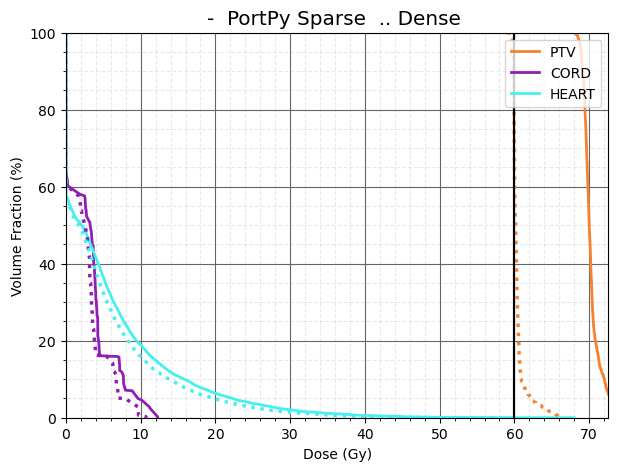

Done!


In [135]:
#  DVH

dose_dense = plan_dense.inf_matrix.A @ x_A_dense
dose_sparse = plan_dense.inf_matrix.A @ x_sparse

fig, ax = plt.subplots(figsize=(7, 5))
struct_names = ['PTV', 'ESOPHAGUS', 'HEART', 'CORD']
ax = pp.Visualization.plot_dvh(plan_dense, dose_1d=dose_sparse, struct_names=struct_names, style='solid', ax=ax)
ax = pp.Visualization.plot_dvh(plan_dense, dose_1d=dose_dense, struct_names=struct_names, style='dotted', ax=ax)
ax.set_title('-  PortPy Sparse  .. Dense ')
plt.show()
print('Done!')

In [234]:
opt = pp.Optimization(plan_dense, opt_params=opt_params)
opt.create_cvxpy_problem()

sol= opt.solve(solver='MOSEK', verbose=False)

Objective Start
Objective done
Constraints Start
Structure ESOPHAGUS not available!
Structure ESOPHAGUS not available!
Constraints done


In [235]:
# visualize plan metrics based upon clinical criteria
pp.Evaluation.display_clinical_criteria(plan_dense, sol=sol)

,name,parameters,constraints,Plan Value
0,max_dose,{'structure_name': 'GTV'},"{'limit_dose_gy': 69, 'goal_dose_gy': 66}",65.960526
1,max_dose,{'structure_name': 'PTV'},"{'limit_dose_gy': 69, 'goal_dose_gy': 66}",65.960526
2,max_dose,{'structure_name': 'HEART'},{'limit_dose_gy': 66},59.355840
3,mean_dose,{'structure_name': 'HEART'},"{'limit_dose_gy': 27, 'goal_dose_gy': 20}",4.756936
4,dose_volume_V,"{'structure_name': 'HEART', 'dose_gy': 30}",{'limit_volume_perc': 50},1.433086
5,dose_volume_V,"{'structure_name': 'HEART', 'dose_gy': 30}",{'goal_volume_perc': 48},1.433086
6,max_dose,{'structure_name': 'LUNG_L'},{'limit_dose_gy': 66},65.960526
7,max_dose,{'structure_name': 'LUNG_R'},{'limit_dose_gy': 66},25.475057
8,max_dose,{'structure_name': 'CORD'},"{'limit_dose_gy': 50, 'goal_dose_gy': 48}",10.729693
9,max_dose,{'structure_name': 'SKIN'},{'limit_dose_gy': 60},50.964039


<Axes: xlabel='x-axis (beamlets column)', ylabel='y-axis (beamlets row)'>

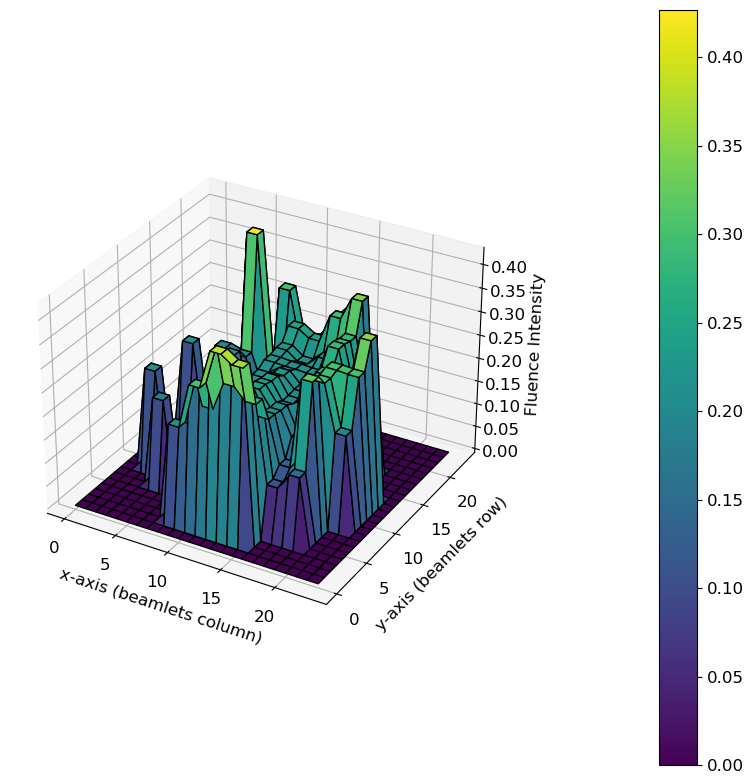

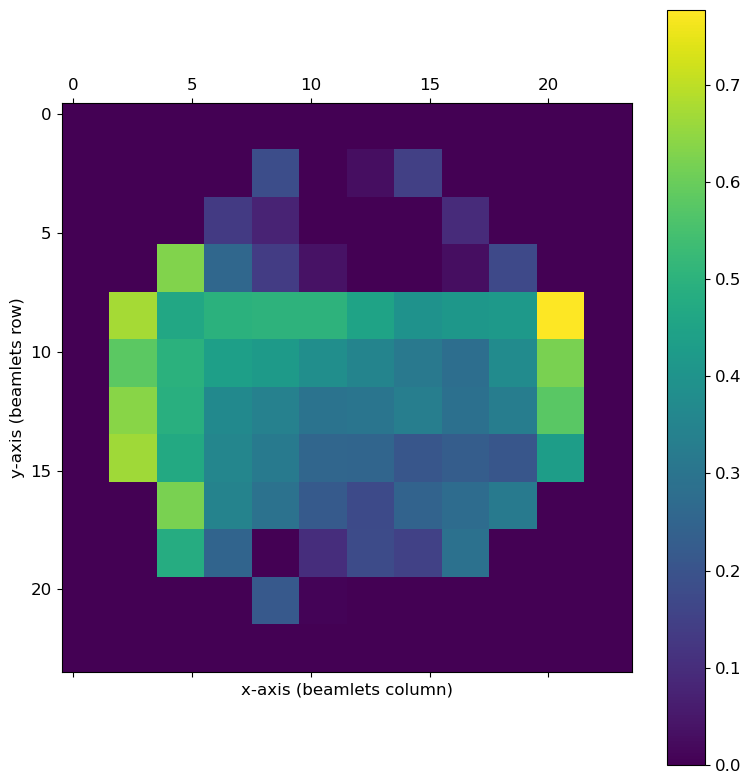

In [254]:
# plot fluence 3d and 2d for the 1st beam

pp.Visualization.plot_fluence_3d(sol=sol_sparse, beam_id=plan_sparse.beams.get_all_beam_ids()[1])

pp.Visualization.plot_fluence_2d(sol=sol_sparse, beam_id=plan_sparse.beams.get_all_beam_ids()[0])


<Axes: title={'center': 'Axial View - Slice #: 60'}>

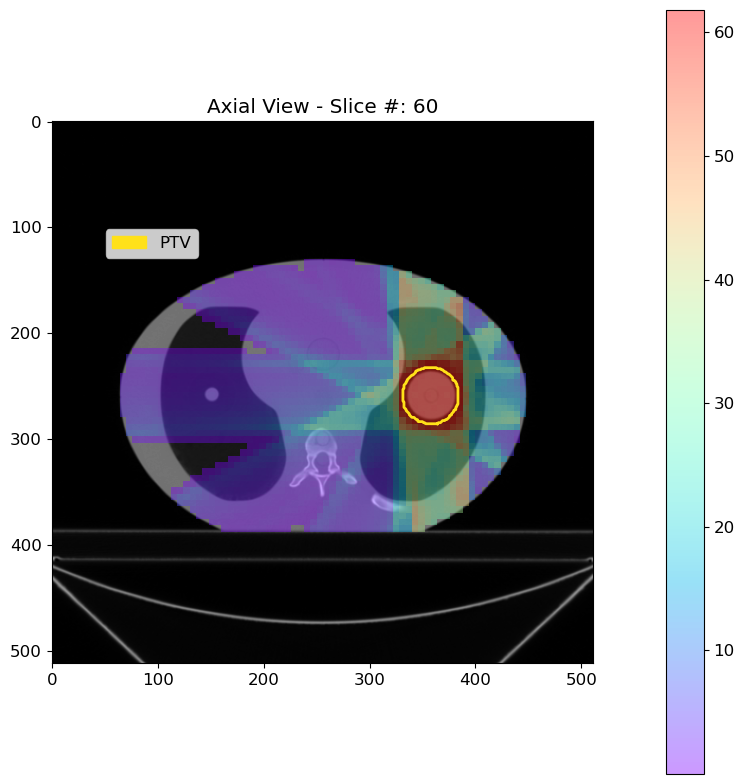

In [256]:
# plot 2d axial slice for the given solution and display the structures contours on the slice
pp.Visualization.plot_2d_slice(my_plan=plan_dense, sol=sol_sparse, slice_num=60, struct_names=['PTV'])

In [262]:

# print("Data Type:", dose_sparse.dtype)

# print("Shape:", dose_sparse.shape)

# print("Size:", dose_sparse.size)


In [264]:

dose_sparse_df = pd.DataFrame(dose_sparse)

description = dose_sparse_df.describe()
print(description)


               0
count  60183.000
mean       5.978
std       12.423
min        0.000
25%        0.000
50%        0.031
75%        5.750
max       77.451


In [301]:
# Norm Frobenius

cost = cp.norm(A_dense  - A_hat , "fro")

prob = cp.Problem(cp.Minimize(cost))

prob.solve()


0.0

In [303]:
# Norm Frobenius

cost = cp.norm(A_dense  - A_hat , "fro")/ cp.norm(A_dense , "fro")

prob = cp.Problem(cp.Minimize(cost))

prob.solve()


0.0